In [93]:
import pandas as pd

In [94]:
import numpy as np

In [95]:
import matplotlib.pyplot as plt

In [96]:
import seaborn as sns

In [97]:
df = pd.read_csv("StudentsPerformance.csv")

In [98]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [99]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [101]:
df.mean()

math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

In [102]:
df.max()

gender                                     male
race/ethnicity                          group E
parental level of education    some high school
lunch                                  standard
test preparation course                    none
math score                                  100
reading score                               100
writing score                               100
dtype: object

In [103]:
df.min()


gender                                     female
race/ethnicity                            group A
parental level of education    associate's degree
lunch                                free/reduced
test preparation course                 completed
math score                                      0
reading score                                  17
writing score                                  10
dtype: object

In [104]:
print(df.iloc[0])

gender                                    female
race/ethnicity                           group B
parental level of education    bachelor's degree
lunch                                   standard
test preparation course                     none
math score                                    72
reading score                                 72
writing score                                 74
Name: 0, dtype: object


In [105]:
cols = df.columns

In [106]:
df.columns = cols

In [107]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [108]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [109]:
education = ["some high school", "high school", "some college", "associate's degree", "bachelor's degree", "master's degree"]

In [110]:
df_math_diff = pd.DataFrame(columns = ['parental_education', 'female_math_difference'])

In [111]:
for e in education:

    male = df[df['gender'] == 'male']
    male_ed = male[male['parental_level_of_education'] == e]
    
    female = df[df['gender'] == 'female']
    female_ed = female[female['parental_level_of_education'] == e]
    
    math_delta = male_ed['math_score'].median() \
    - female_ed ['math_score'].median()
    
    df_math_diff = df_math_diff.append ({'parental_education':e, 
                                         'female_math_difference': math_delta},
                                        ignore_index = True)
                                                                
    

In [112]:
print(df_math_diff)

   parental_education  female_math_difference
0    some high school                     5.0
1         high school                     5.0
2        some college                     3.5
3  associate's degree                     7.0
4   bachelor's degree                     3.0
5     master's degree                    14.5


In [113]:
type(df_math_diff)

pandas.core.frame.DataFrame

Text(0.5, 1.0, 'Difference in the Medians of Math Scores: Male vs Female')

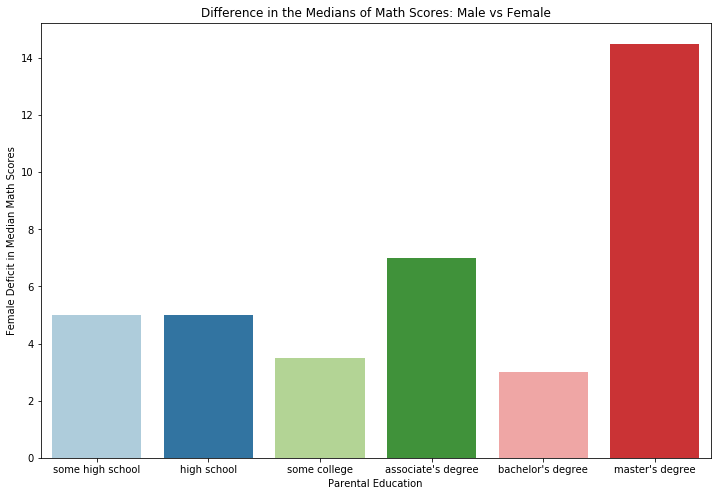

In [143]:
from matplotlib import rcParams
rcParams['figure.figsize']= 12,8

plt1 = sns.barplot(x = "parental_education", y = "female_math_difference", 
                   data = df_math_diff, palette = "Paired")
plt1.set_xlabel('Parental Education')
plt1.set_ylabel('Female Deficit in Median Math Scores')
plt1.set_title('Difference in the Medians of Math Scores: Male vs Female')
